## Classification
* Datset used UCI-Heart Disease Dataset - 'heart.csv'
* The above dataset was used to implement Decision Tree, Naive Baye's Classifier


### Importing necessary libraries

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

### Raw Data
* The dataset contains 14 columns. The last column has values 0, 1
* 1 -> Patient hass heart disease.
* 0 -> Patient does not.
* The 'target' column was used as the column to be predicted based on the values of other columns. 

In [1]:
data = pd.read_csv('Datasets/heart.csv')
print(data.shape)
print(data.head(5))


(303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


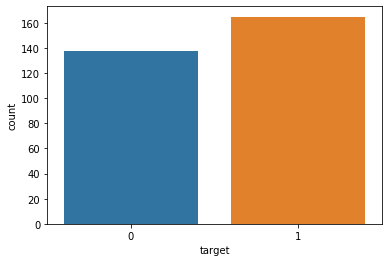

In [2]:
import seaborn as sns
sns.countplot(data['target'],label="Count")
plt.show()

### Visualization
* Box plots were plotted for each of the input variables in order to understand their distribution better.

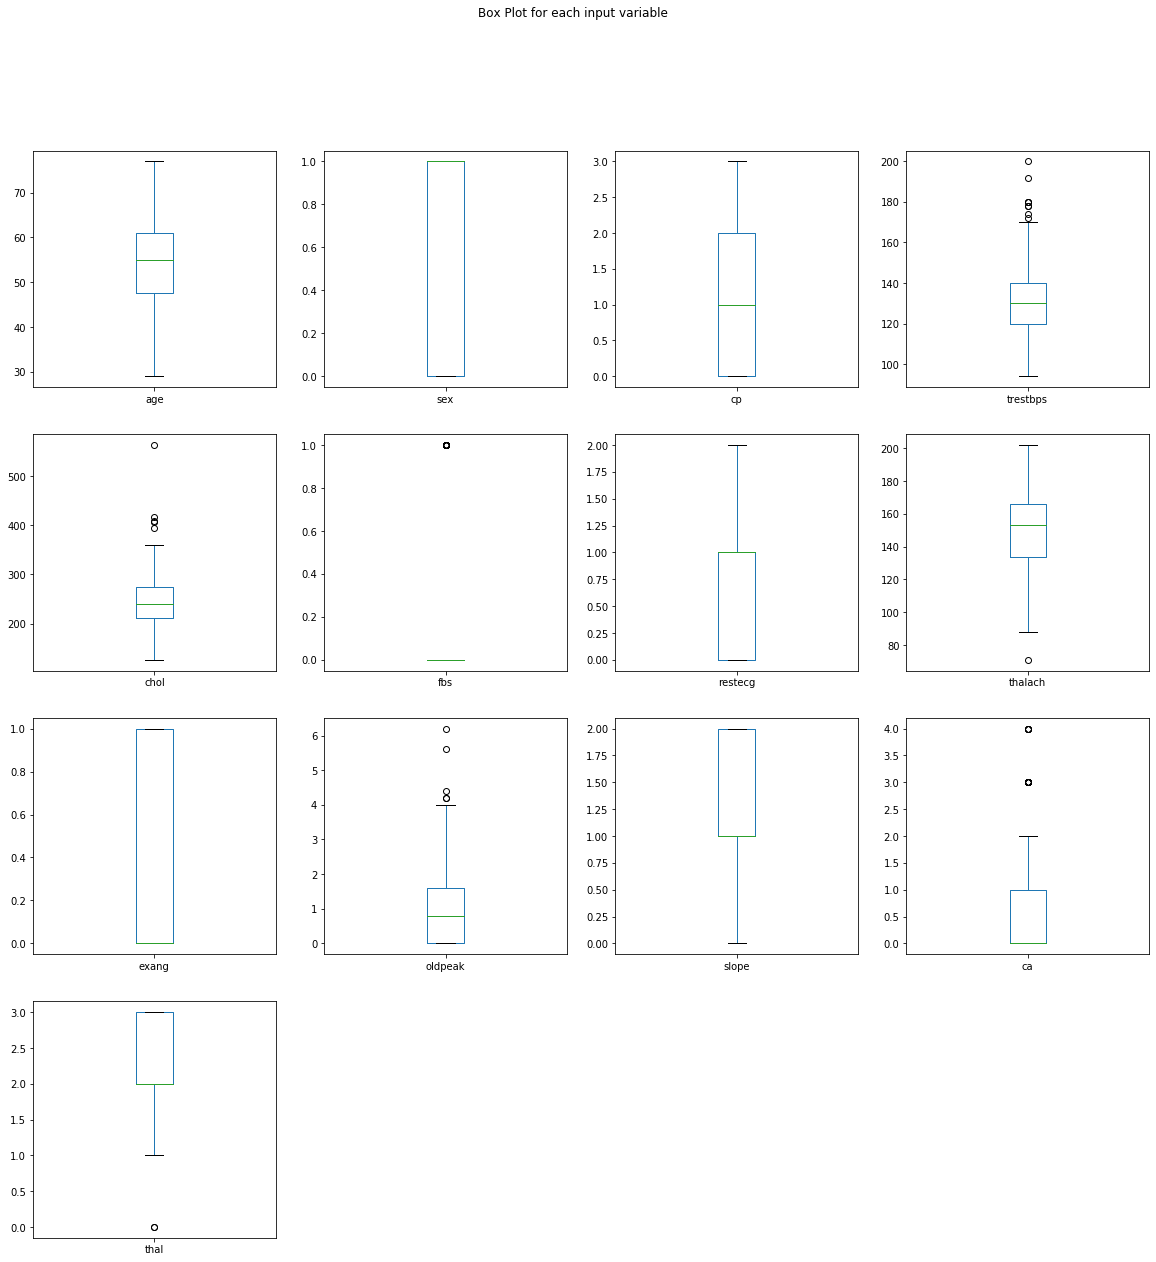

In [12]:
data.drop('target', axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20),                    title='Box Plot for each input variable')
# plt.savefig('fruits_box')
plt.show()

### Pre-processing - Splitting data
* The data was split into test and train data to be classified. 

In [3]:
feature_names = list(data.columns)
feature_names.remove('target')
print(feature_names)
X = data[feature_names]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [11]:

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtc.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.79


In [12]:

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'.format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'.format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.85
Accuracy of GNB classifier on test set: 0.83


#### Evaluation
* The performance of both the classification techniques was evaluated by constructing a confusion matrix. 
* The Decision Tree was found to have higher accuracy on the training set, while the Baye's classifeir performed better on the test set 

In [14]:


print("Baye's Classifier Evaluation")
Bayes_pred = gnb.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

print("Decision Tree Evaluation")
DT_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


Baye's Classifier Evaluation
[[24  9]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76

Decision Tree Evaluation
[[24  9]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76

